In [54]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

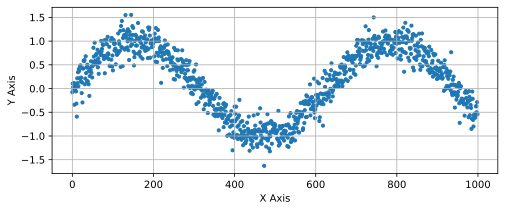

In [55]:
T = 1000
x_true=torch.tensor(list(range(0, 1000)), dtype=torch.float32)
y_true=torch.sin(0.01*x)+torch.normal(0, 0.2, x.shape)
plt.scatter(x, y, s=10)
plt.grid(True)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

In [56]:
tau=4
features=torch.zeros(T-tau, tau)
labels=torch.zeros(T-tau)
for i in range(tau):
    features[:,i]=y_true[i:i+T-tau]
labels=y[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

In [57]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4, 10),
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net

loss = nn.MSELoss(reduction='none')

In [58]:
def train(net, train_iter, loss, epochs, lr):
    optimizer=torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            y_hat=net(X)
            ls=loss(y, y_hat)
            ls.sum().backward()
            optimizer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net=get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.064174
epoch 2, loss: 0.056441
epoch 3, loss: 0.053990
epoch 4, loss: 0.053765
epoch 5, loss: 0.055040


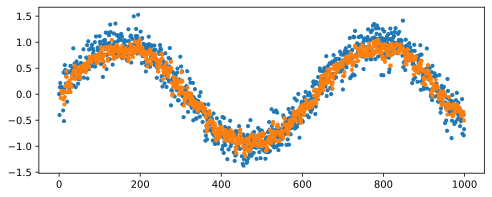

In [59]:
onestep_pred=net(features)
plt.scatter(x_true, y_true, s=10)
plt.scatter(x_true[tau:], onestep_pred.detach(), s=10)
plt.show()

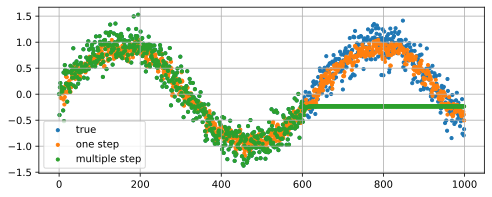

In [63]:
tau_predict=torch.zeros(T)
tau_predict[: n_train + tau] = y_true[: n_train + tau]
for i in range(n_train + tau, T):
    tau_predict[i]=net(tau_predict[i-tau:i].reshape(1,-1))

plt.scatter(x_true, y_true, s=10, label="true")
plt.scatter(x_true[tau:], onestep_pred.detach(), s=10, label="one step")
plt.scatter(x_true, tau_predict.detach(), s=10, label="multiple step")

plt.grid(True)
plt.legend()

plt.show()